In [30]:
import numpy as np
import pandas as pd
from nltk.tokenize import sent_tokenize, word_tokenize
from gensim.models import Word2Vec
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer

import matplotlib.pyplot as plt

import seaborn as sns
sns.set(style = "whitegrid", 
        color_codes = True,
        font_scale = 1.5)

In [21]:
data = pd.read_excel('textresponses_20200501.xlsx')
data.head(5)

,basic_text,dis_healthcare,dis_internet,dis_academic,dis_social,dis_psych,inst_apprec,inst_wish,inst_help,inst_text,inst_country,institution,std_inst,pseudu_id,dummy_lang
0,NaN,N/A or Don't Know,N/A or Don't Know,Much worse than before,Much worse than before,Much worse than before,NaN,NaN,NaN,NaN,United States of America (USA),NaN,NaN,1,0
1,Our university has moved fully to online instr...,Worse than before,Worse than before,Worse than before,Much worse than before,Worse than before,Move everything online and stopped expecting g...,"this all earlier, and would have extended the ...",Pay us more. Now that we essentially must work...,NaN,United States of America (USA),University of California -- San Diego,"University of California, San Diego",2,0
2,I have asthma so I've been very isolated and f...,Much worse than before,Much worse than before,N/A or Don't Know,Much worse than before,Much worse than before,Online classes,More information,Prepare for emergencies,NaN,United States of America (USA),UC San Diego,"University of California, San Diego",3,0
3,NaN,Same as before,Same as before,Same as before,Much worse than before,Worse than before,Close in a timely manner,Communicated better with My undergraduate stud...,Provide more guidance to intl students,NaN,Canada,McGill University,McGill University,4,0
4,"Dorms and residences aren't closed, but underg...",N/A or Don't Know,Same as before,Much worse than before,Much worse than before,Worse than before,moved to virtual classes sooner than most othe...,made courses pass/fail even for graduate students,relax requirements for this semester,NaN,United States of America (USA),Columbia University in the City of New York,Columbia University,5,0


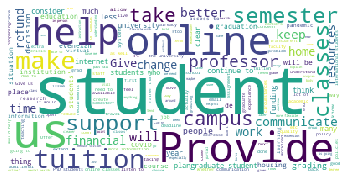

In [38]:
cleaned = data.copy()
cleaned['inst_help'].fillna('', inplace=True)
text = cleaned['inst_help'].values 
stop_words = [] + list(STOPWORDS)
wordcloud = WordCloud(stopwords = stop_words, background_color="white").generate(str(text))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [41]:
def get_top_n_words(corpus, n=None):
    """
    List the top n words in a vocabulary according to occurrence in a text corpus.
    
    get_top_n_words(["I love Python", "Python is a language programming", "Hello world", "I love the world"]) -> 
    [('python', 2),
     ('world', 2),
     ('love', 2),
     ('hello', 1),
     ('is', 1),
     ('programming', 1),
     ('the', 1),
     ('language', 1)]
    """
    vec = CountVectorizer(stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

result = get_top_n_words(text, 20)
result

[('students', 157),
 ('online', 53),
 ('tuition', 48),
 ('provide', 43),
 ('help', 39),
 ('classes', 36),
 ('make', 29),
 ('campus', 29),
 ('semester', 27),
 ('university', 23),
 ('support', 22),
 ('communicate', 22),
 ('better', 22),
 ('student', 21),
 ('information', 20),
 ('graduate', 19),
 ('professors', 19),
 ('funding', 18),
 ('resources', 18),
 ('grading', 18)]